In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\R101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

best_known_solution: 828.94
num_cust= 25
num_vehicles= 25
n= 75
len(vrp.distance_matrix)=  75
vrp.distance_matrix[0]=  [0, 325, 145, 322, 322, 248, 210, 315, 178, 155, 264, 166, 264, 468, 453, 424, 407, 228, 282, 164, 292, 392, 461, 277, 376, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
vrp.distance_matrix[1]=  [325, 0, 344, 202, 238, 164, 362, 360, 474, 432, 502, 234, 94, 211, 130, 251, 326, 274, 474, 490, 104, 122, 233, 349, 301, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
vrp.distance_matrix[2]=  [145, 344, 0, 250, 427, 335, 353, 450, 150, 291, 403, 111, 320, 531, 471, 514, 522, 

{'LogPeriod': 100000, 'LogVerbosity': 'Terse'}

In [20]:
solution = model.solve(TimeLimit=tlim)

C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:168(stream:2292:1): Warning: Constraint 'span': master interval variable 'T0' is optional but spanned interval 'V25_0' is present.
                                                                                                                                                                                              span(T0, [V0_0, V1_0, V2_0, V3_0, V4_0, V5_0, V6_0, V7_0, V8_0, V9_0, V10_0, V11_0, V12_0, V13_0, V14_0, V15_0, V16_0, V17_0, V18_0, V19_0, V20_0, V21_0, V22_0, V23_0, V24_0, V25_0, V26_0, V27_0, V28_0, V29_0, V30_0, V31_0, V32_0, V33_0, V34_0, V35_0, V36_0, V37_0, V38_0, V39_0, V40_0, V41_0, V42_0, V43_0, V44_0, V45_0, V46_0, V47_0, V48_0, V49_0, V50_0, V51_0, V52_0, V53_0, V54_0, V55_0, V56_0, V57_0, V58_0, V59_0, V60_0, V61_0, V62_0, V63_0, V64_0, V65_0, V66_0, V67_0, V68_0, V69_0, V70_0, V71_0, V72_0, V73_0, V74_0])


In [8]:
import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            if sol.presence != False and sol.size != 0:
                print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()


V19_14: (start=100, end=1000, size=900, length=900)
V19_14: (start=100, end=1000, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V3_16: (start=3867, end=4767, size=900, length=900)
V3

In [1]:
# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)


NameError: name 'solutions' is not defined

In [ ]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

best_known_solution: 191.3
num_cust= 25
num_vehicles= 25
n= 75
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 1975 variables, 200 constraints
 ! TimeLimit            = 100
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.05s (0.05s extraction + 0.00s propagation)
 !  . Log search space  : 448.3 (before), 448.3 (after)
 !  . Memory usage      : 19.9 MB (before), 19.9 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0       1975                 -
 + New bound is 22319.99
                        0        725                 -
 + New bound is 24729.99
 *      33095.20     2742  0.33s        1      (gap is 25.28%)
 *      33071.30     2730  0.33s        2      (gap is 25.22%)
 *      33069.40     2724  0.33s        5    

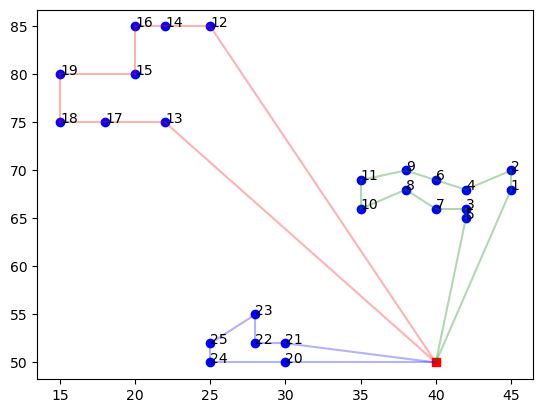

Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 100
Node 20 arrive 100 early 100 late 730 start 100
Distance from 20 to 24 is 50
Node 24 arrive 1050 early 650 late 1440 start 1050
Distance from 24 to 25 is 20
Node 25 arrive 1970 early 1690 late 2240 start 1970
Distance from 25 to 23 is 42
Node 23 arrive 2912 early 7320 late 7770 start 7320
Distance from 23 to 22 is 30
Node 22 arrive 8250 early 8120 late 8830 start 8250
Distance from 22 to 21 is 20
Node 21 arrive 9170 early 9140 late 9650 start 9170
Distance from 21 to 0 is 101
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 3 is 10
Node 3 arrive 1061 early 650 late 1460 start 1061
Distance from 3 to 7 is 20
Node 7 arrive 1981 early 1700 late 2250 start 1981
Distance from 7 to 8 is 28
Node 8 arrive 2909 early 2550 late 3240 start 2909
Distance from 8 to 10 is 36
Node 10 arrive 3845 early 3570 late 4100 start 3845
Distance from 10 to 11 i

In [15]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 100

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

solution = model.solve(TimeLimit=tlim)

import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            pass
            # if sol.presence != False and sol.size != 0:
            #     print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                # print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
                    print("found path", key)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()

# convert sequence to path
paths = []
for sol in solutions:
    path = []
    for i in range(len(sol.lvars)):
        prdel = int(sol.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    if path in paths:
        continue
    # path.reverse()
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)
validate_path(paths, cvrptw_prob)

191.3
3.22
[[0, 20, 24, 0, 23, 22, 21, 0], [0, 5, 3, 7, 8, 10, 11, 9, 6, 4, 2, 1, 0], [0, 13, 17, 18, 19, 15, 16, 14, 12, 0]]


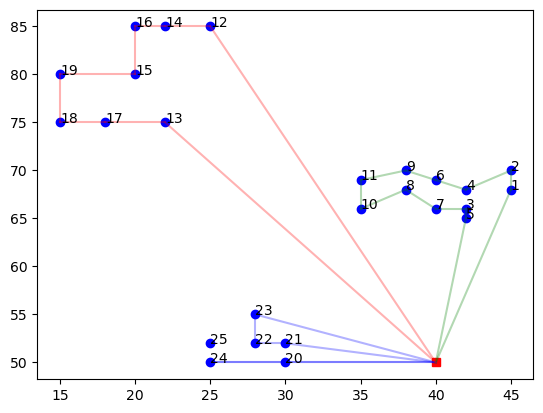

In [16]:
# instance['our_best_solution']['paths'][2][5] = 25
# validate_path(instance['our_best_solution'], cvrptw_prob)
ref_paths = instance['our_best_solution']
print(ref_paths['total_distance'])
print(ref_paths['search_progress'][-1][1])
print(ref_paths['paths'])
visualize_path(ref_paths, None, cvrptw_prob)

In [15]:
validate_path(paths, cvrptw_prob)


Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 13 is 308
Node 13 arrive 308 early 300 late 920 start 308
Distance from 13 to 17 is 40
Node 17 arrive 1248 early 990 late 1480 start 1248
Distance from 17 to 18 is 30
Node 18 arrive 2178 early 1790 late 2540 start 2178
Distance from 18 to 19 is 50
Node 19 arrive 3128 early 2780 late 3450 start 3128
Distance from 19 to 15 is 50
Node 15 arrive 4078 early 3840 late 4290 start 4078
Distance from 15 to 16 is 50
Node 16 arrive 5028 early 4750 late 5280 start 5028
Distance from 16 to 14 is 20
Node 14 arrive 5948 early 5670 late 6200 start 5948
Distance from 14 to 23 is 305
Node 23 arrive 7153 early 7320 late 7770 start 7320
Distance from 23 to 22 is 30
Node 22 arrive 8250 early 8120 late 8830 start 8250
Distance from 22 to 0 is 121
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 100
Node 20 arrive 100 early 100 late 730 start 100
Distance from 20 to 24 is 50
Node 24 arrive 1050 early 650 late 1440 start 1050
Distance fr

AssertionError: Total distance 235.5 does not match objective value 232.0

In [35]:
print(solution.solution['V7'])
print(solution.solution['TW7'])
print(solution.solution['V7_2'])
print(solution.solution['V11_2'])
print(solution.solution['V12_2'])
print(solution.solution['V7_2'])



IntervalVarValue(start=2028, end=2928, size=900)
IntervalVarValue(start=2550, end=4140, size=1590)
IntervalVarValue(start=2028, end=2928, size=900)
()
()
IntervalVarValue(start=2028, end=2928, size=900)


In [8]:
num_vehicles = num_cust = 25
n = num_cust + num_vehicles * 2

for vehicle in range(num_vehicles):
    i = num_cust + num_vehicles + vehicle
    idx = f'V{i}_{vehicle}'
    res = solution.solution[idx]
    print(idx, res)
    idx = f'R{vehicle}'
    res = solution.solution[idx]
    print(f'R{vehicle}', len(res), len(res)*90)


V50_0 IntervalVarValue(start=0, end=0, size=0)
R0 2 180
V51_1 IntervalVarValue(start=0, end=0, size=0)
R1 2 180
V52_2 IntervalVarValue(start=0, end=0, size=0)
R2 2 180
V53_3 IntervalVarValue(start=0, end=0, size=0)
R3 2 180
V54_4 IntervalVarValue(start=0, end=0, size=0)
R4 2 180
V55_5 IntervalVarValue(start=0, end=0, size=0)
R5 2 180
V56_6 IntervalVarValue(start=0, end=0, size=0)
R6 2 180
V57_7 IntervalVarValue(start=0, end=0, size=0)
R7 2 180
V58_8 IntervalVarValue(start=0, end=0, size=0)
R8 2 180
V59_9 IntervalVarValue(start=0, end=0, size=0)
R9 2 180
V60_10 IntervalVarValue(start=1017, end=1017, size=0)
R10 11 990
V61_11 IntervalVarValue(start=0, end=0, size=0)
R11 2 180
V62_12 IntervalVarValue(start=0, end=0, size=0)
R12 2 180
V63_13 IntervalVarValue(start=0, end=0, size=0)
R13 2 180
V64_14 IntervalVarValue(start=0, end=0, size=0)
R14 2 180
V65_15 IntervalVarValue(start=0, end=0, size=0)
R15 2 180
V66_16 IntervalVarValue(start=0, end=0, size=0)
R16 2 180
V67_17 IntervalVarValue(sta

In [19]:
temp = solution.solution['R21']


best_known_solution: 191.3
best_known_solution: 191.3
prdel
 ! --------------------------------------------------- CP Optimizer 22.1.1.0 --
 ! Minimization problem - 251 variables, 277 constraints
 ! TimeLimit            = 10
 ! LogPeriod            = 100000
 ! LogVerbosity         = Terse
 ! Initial process time : 0.02s (0.02s extraction + 0.01s propagation)
 !  . Log search space  : 1094.5 (before), 1094.5 (after)
 !  . Memory usage      : 2.0 MB (before), 2.0 MB (after)
 ! Using parallel search with 12 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        251                 -
 + New bound is 123.0999
                        0        148    1   F        -
 + New bound is 133.0892
 *      606.1000       25  0.07s        1      (gap is 78.04%)
 I Used: 10
 *      523.3000      203  0.07s        1      (gap is 74.57%)
 I Used: 9
 *      522.7000      304  

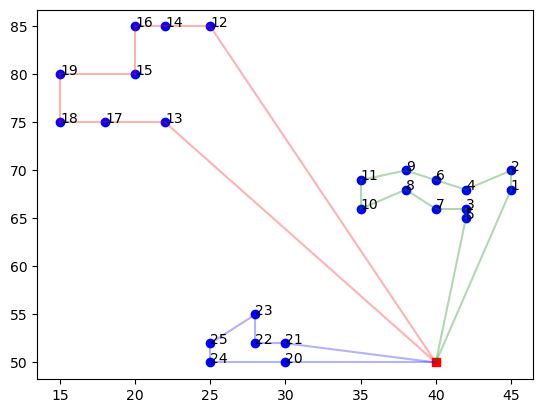

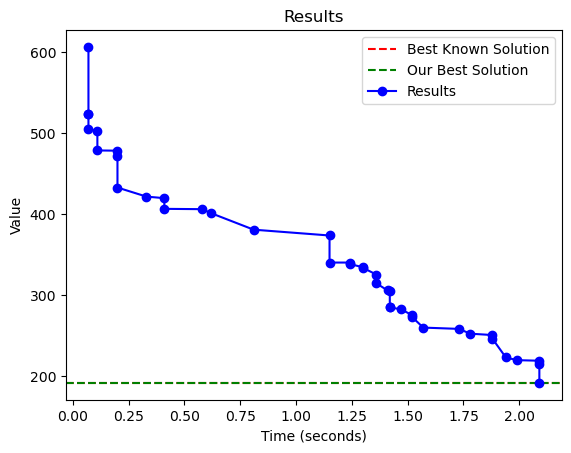

Veh 0 ---> 0 (a = 0, t = 0 <= 0 <= 0) 20 (a = 0, t = 100 <= 100 <= 730) -- 900 + 50 --> 24 (a = 1050, t = 650 <= 1050 <= 1440) -- 900 + 20 --> 25 (a = 1970, t = 1690 <= 1970 <= 2240) -- 900 + 42 --> 23 (a = 2912, t = 7320 <= 7320 <= 7770) -- 900 + 30 --> 22 (a = 8250, t = 8120 <= 8250 <= 8830) -- 900 + 20 --> 21 (a = 9170, t = 9140 <= 9170 <= 9650) -- 900 + 101 --> 0 (a = 10171, t = 0 <= 10171 <= 0) --- D = 263.0, L = 110
Veh 1 ---> 0 (a = 0, t = 0 <= 0 <= 0) 5 (a = 0, t = 150 <= 150 <= 670) -- 900 + 10 --> 3 (a = 1060, t = 650 <= 1060 <= 1460) -- 900 + 20 --> 7 (a = 1980, t = 1700 <= 1980 <= 2250) -- 900 + 28 --> 8 (a = 2908, t = 2550 <= 2908 <= 3240) -- 900 + 36 --> 10 (a = 3844, t = 3570 <= 3844 <= 4100) -- 900 + 30 --> 11 (a = 4774, t = 4480 <= 4774 <= 5050) -- 900 + 31 --> 9 (a = 5705, t = 5340 <= 5705 <= 6050) -- 900 + 22 --> 6 (a = 6627, t = 6210 <= 6627 <= 7020) -- 900 + 22 --> 4 (a = 7549, t = 7270 <= 7549 <= 7820) -- 900 + 36 --> 2 (a = 8485, t = 8250 <= 8485 <= 8700) -- 900 

In [11]:
from integer_model import *

instance = Integer_model()
instance.read_json(fname)

print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
if instance.instance['best_known_solution'] is not None:
    print('best_known_solution:', instance.instance['best_known_solution']['Distance'])
    print('prdel')
else:
    print('best_known_solution: None')

instance.solve(tlim)
instance.visualize_solution()
instance.visualize_progress()
instance.display_solution()
instance.validate_solution()
